In [58]:
#import relevant libraries
import pandas as pd 
import numpy as np 
import seaborn as sns

from sklearn.preprocessing import LabelEncoder  
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [8]:
#import the dataset
employee_data=pd.read_excel("Dataset/Hr_data.xls")

In [11]:
#Read the first three rows of the dataset
employee_data.head(3)


,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4


<Axes: xlabel='EducationBackground', ylabel='count'>

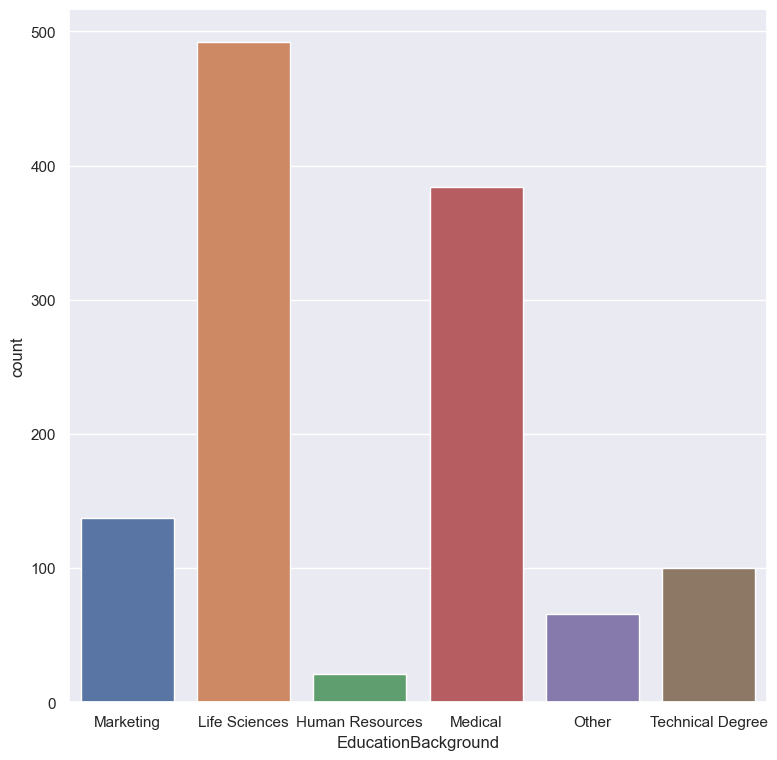

In [21]:
#Analyse educational background
sns.set(rc={'figure.figsize':(9,9)})
sns.countplot(x="EducationBackground", data=employee_data)

In [22]:
#identify the number of unique departments in the dataset
employee_data['EmpDepartment'].value_counts()

Sales                     373
Development               361
Research & Development    343
Human Resources            54
Finance                    49
Data Science               20
Name: EmpDepartment, dtype: int64

In [23]:
#Group by department then find which department has the highest performance rating
employee_data.groupby("EmpDepartment")['PerformanceRating'].mean()

EmpDepartment
Data Science              3.050000
Development               3.085873
Finance                   2.775510
Human Resources           2.925926
Research & Development    2.921283
Sales                     2.860590
Name: PerformanceRating, dtype: float64

Number of employees in the dataset:1200


<Axes: xlabel='PerformanceRating', ylabel='count'>

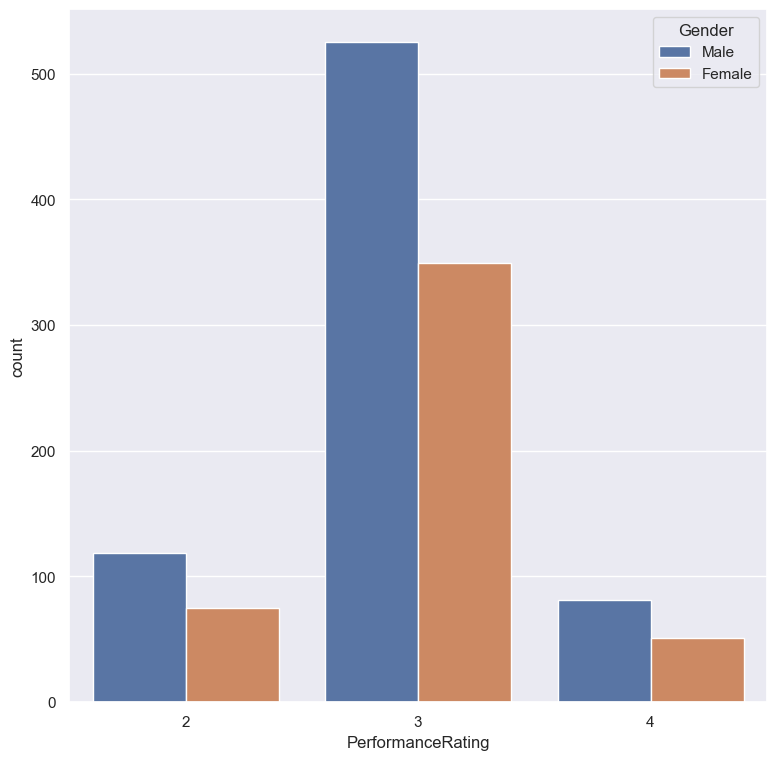

In [24]:
print("Number of employees in the dataset:" +str(len(employee_data.index)))
#Analyse the data
sns.countplot(x="PerformanceRating", hue="Gender", data=employee_data)

<Axes: ylabel='Frequency'>

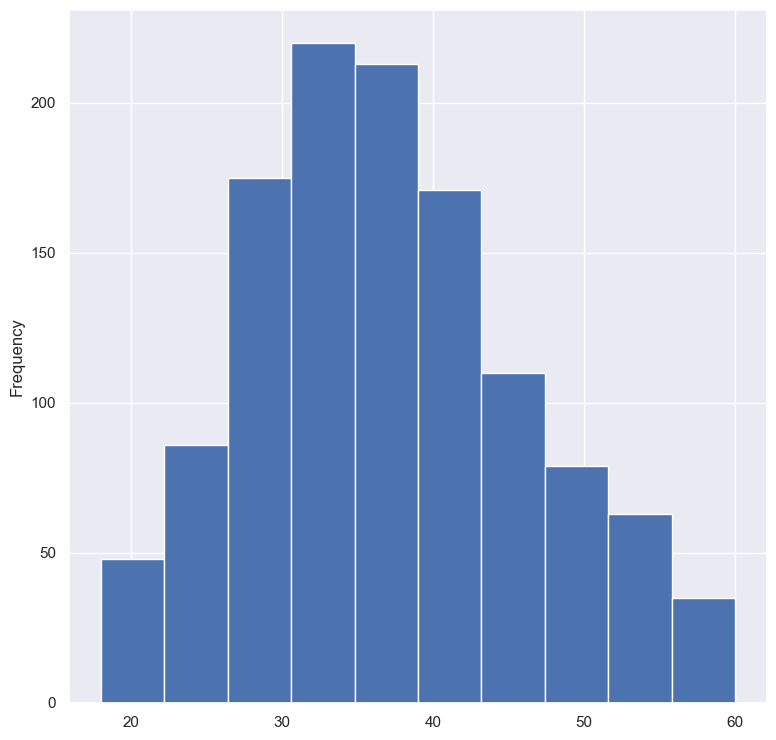

In [25]:
#investigate the age distribution of the dataset
employee_data["Age"].plot.hist()

<Axes: ylabel='Frequency'>

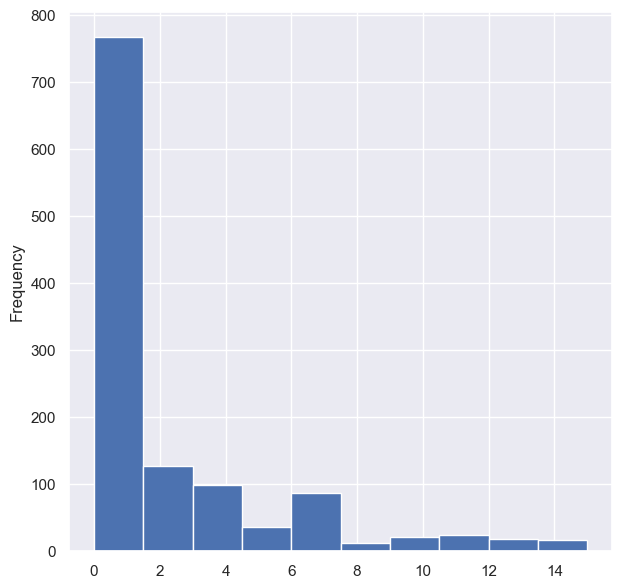

In [26]:
#Analyse years since promotion
employee_data["YearsSinceLastPromotion"].plot.hist(figsize=(7,7))

In [27]:
#Analyse which columns have not been visualized yet
employee_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

In [29]:
#Check if there are any missing values
employee_data.isnull().values.any()

False

In [30]:
#Check the categories or values of the target variable (perfoemance rating)
employee_data['PerformanceRating'].unique()

array([3, 4, 2], dtype=int64)

In [53]:
#List all categorical columns
employee_data.select_dtypes(include=['object']).head(3)


,EmpNumber,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,OverTime,Attrition
0,E1001000,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,No,No
1,E1001006,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,No,No
2,E1001007,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,Yes,No


In [50]:
#Use the Lable encoder to transform categorical values to numbers. 
#Note that EmpNumber is not categorical, it is type object that holds unique values (index)
le = LabelEncoder()

employee_data_copy = employee_data.copy()
employee_data_copy["Gender"] = le.fit_transform(employee_data_copy["Gender"])
employee_data_copy["EducationBackground"] = le.fit_transform(employee_data_copy["EducationBackground"])
employee_data_copy["MaritalStatus"] = le.fit_transform(employee_data_copy["MaritalStatus"])
employee_data_copy["EmpDepartment"] = le.fit_transform(employee_data_copy["EmpDepartment"])
employee_data_copy["EmpJobRole"] = le.fit_transform(employee_data_copy["EmpJobRole"])
employee_data_copy["BusinessTravelFrequency"] = le.fit_transform(employee_data_copy["BusinessTravelFrequency"])
employee_data_copy["OverTime"] = le.fit_transform(employee_data_copy["OverTime"])
employee_data_copy["Attrition"] = le.fit_transform(employee_data_copy["Attrition"])

#set the target and predictor variables
col = list(employee_data_copy)
X = employee_data_copy[col[1:27]]
y = employee_data_copy['PerformanceRating']

In [51]:
#Create train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [52]:
#Train the data using Random Forest Classifier
rfc= RandomForestClassifier(n_jobs=2, oob_score=True, n_estimators=500)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, n_jobs=2, oob_score=True)

In [55]:
#Use the trained classifier on the test data
y_pred = rfc.predict(X_test)

In [56]:
#Calculate the classifiers score
rfc.score(X_test, y_test)

0.93

In [60]:
#Use the confusion matrix to predict the actual and the predicted values
cm=confusion_matrix(y_test, y_pred)
print(cm)

[[ 32   5   0]
 [  6 224   2]
 [  0   8  23]]


In [61]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           2       0.84      0.86      0.85        37
           3       0.95      0.97      0.96       232
           4       0.92      0.74      0.82        31

    accuracy                           0.93       300
   macro avg       0.90      0.86      0.88       300
weighted avg       0.93      0.93      0.93       300

